In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import timedelta

In [9]:
sp500_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]


In [10]:
def get_stock_data(tickers, start, end):
    all_data = []
    for i in range(0, len(tickers), 50):  # Download data in chunks of 50 tickers to avoid overloading
        tickers_chunk = tickers[i:i+50]
        data = yf.download(tickers_chunk, start=start, end=end)
        all_data.append(data['Close'])
    return pd.concat(all_data, axis=1)

In [15]:
# Parameters
time_range = 1  # Number of years back from today

# Get today's date
end_date = datetime.datetime.today()

# Calculate the start date based on time_range
start_date = end_date - timedelta(days=time_range*120)

# Format dates as strings
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')

# Get the list of ticker symbols as a list
tickers = sp500_tickers['Symbol'].tolist()

# Get historical data for S&P 500 constituents
data = get_stock_data(tickers, start_date_str, end_date_str)

[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-04-07 -> 2024-08-05)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  3 of 3 completed


In [16]:
data.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-08,144.460007,13.90,168.449997,169.800003,160.270004,110.519997,94.550003,331.799988,484.279999,196.690002,...,392.579987,267.390015,34.419998,105.989998,54.080002,127.750000,135.220001,126.690002,296.869995,165.690002
2024-04-09,147.399994,13.95,169.669998,170.139999,162.660004,112.440002,91.220001,334.450012,492.549988,204.119995,...,392.380005,265.100006,35.029999,106.489998,54.369999,128.929993,137.020004,129.399994,306.170013,167.139999
2024-04-10,144.160004,13.41,167.779999,169.029999,160.279999,111.169998,92.190002,324.399994,487.220001,196.330002,...,389.769989,263.829987,33.599998,104.239998,53.750000,128.190002,137.949997,127.720001,299.910004,163.199997
2024-04-11,145.000000,13.62,175.039993,167.520004,165.419998,111.449997,91.309998,325.190002,484.279999,198.639999,...,387.579987,260.309998,33.650002,104.860001,53.490002,128.789993,138.330002,127.519997,297.540009,162.729996
2024-04-12,140.729996,13.15,176.550003,162.279999,159.369995,109.110001,89.980003,315.399994,474.089996,192.270004,...,380.000000,260.309998,33.240002,101.180000,53.169998,128.110001,137.800003,124.480003,289.679993,149.979996


In [17]:
# Function to calculate the Advance-Decline Line
def calculate_ad_line(data):
    # Calculate daily advances and declines
    daily_changes = data.diff()
    advances = (daily_changes > 0).sum(axis=1)
    declines = (daily_changes < 0).sum(axis=1)
    
    # Calculate net advances
    net_advances = advances - declines
    
    # Calculate the AD Line
    ad_line = net_advances.cumsum()
    
    return ad_line

# Function to plot the Advance-Decline Line and S&P 500 index
def plot_ad_line_and_sp500(ad_line, sp500):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('S&P 500 Index', color='tab:blue')
    ax1.plot(sp500.index, sp500, label='S&P 500 Index', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Advance-Decline Line', color='tab:orange')  # we already handled the x-label with ax1
    ax2.plot(ad_line.index, ad_line, label='Advance-Decline Line', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    ax2.legend(loc='upper right')
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('S&P 500 Index and Advance-Decline Line')
    plt.grid(True)
    plt.show()

[*********************100%%**********************]  1 of 1 completed


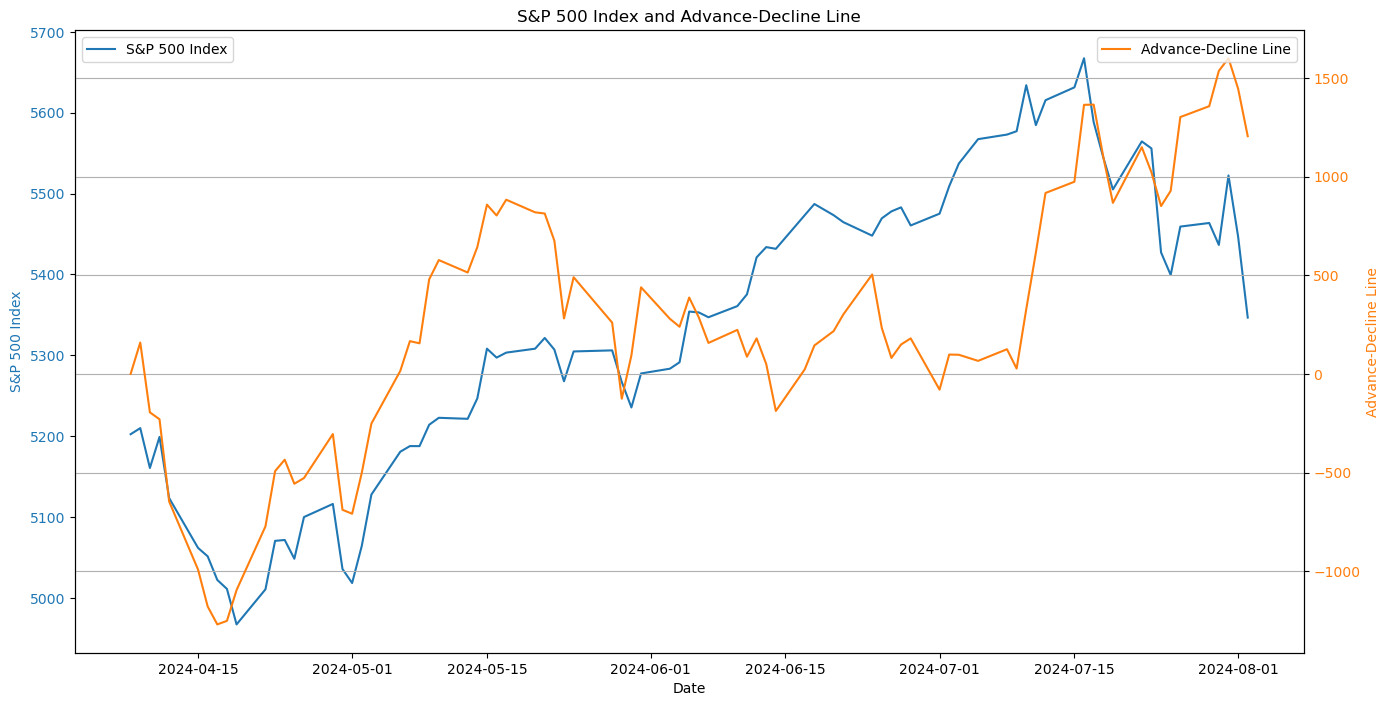

In [18]:
# Calculate the AD Line
ad_line = calculate_ad_line(data)

sp500 = yf.download('^GSPC', start=start_date_str, end=end_date_str)['Close']

# Plot the AD Line
plot_ad_line_and_sp500(ad_line, sp500)